<a href="https://colab.research.google.com/github/SamaraMoreira/AbxTecnologia/blob/main/AbxTecnologia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import (f1_score
                             , accuracy_score
                             , precision_score
                             , recall_score
                             , classification_report)

In [28]:
dados = pd.read_csv("/content/sample_data/solicitacoescredito.csv")

In [29]:
df = pd.DataFrame(dados)


In [30]:
colunas = df.columns.values


In [31]:
df.head()


,numero_solicitacao,razaoSocial,nomeFantasia,cnpjSemTraco,maiorAtraso,margemBrutaAcumulada,percentualProtestos,primeiraCompra,prazoMedioRecebimentoVendas,titulosEmAberto,...,periodoDemonstrativoEmMeses,custos,anoFundacao,intervaloFundacao,capitalSocial,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito,dataAprovadoNivelAnalista
0,1,James Richardson-Patel,Alexandra Williams,KEBE17609492220843,0,0.252448,0.0,2015-12-10T00:00:00,0,0.00,...,12.0,0.0,2003.0,Acima de 17 anos,90000.0,False,True,1.0,43200.0,2020-02-03T20:57:33
1,2,Dr. Geoffrey Walsh,Mr. Darren Arnold,JRBK88908250677300,0,0.000000,NaN,2019-06-12T17:28:31,0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2,3,Joanna Hudson,Dr. David Rees,GCVQ28531614261293,4,0.624777,0.0,2019-11-27T00:00:00,0,0.00,...,7.0,0.0,2014.0,De 6 a 10 anos,20000.0,False,True,1.0,4320.0,2020-02-04T16:40:49
3,4,Gordon Jones-Hopkins,Sara Reid-Robson,KJND32266018316396,20,0.000000,NaN,2017-02-13T17:20:27,0,0.00,...,12.0,0.0,2013.0,De 6 a 10 anos,30000.0,False,True,0.0,5920.0,2020-02-04T16:37:52
4,5,Nigel Lee,Dr. Stanley Duncan,CGQN15826802440348,20,0.454088,0.0,2010-07-13T00:00:00,20,1486.95,...,9.0,40680051.0,2002.0,Acima de 17 anos,75000.0,False,False,1.0,89000.0,2020-02-04T15:06:28


In [32]:
# Verificar onde estão os valores nulos
valores_nulos = df.isnull()

# Contar o número de valores nulos em cada coluna
contagem_nulos_por_coluna = valores_nulos.sum()

In [33]:
contagem_nulos_por_coluna

numero_solicitacao                0
razaoSocial                       0
nomeFantasia                      0
cnpjSemTraco                      0
maiorAtraso                       0
margemBrutaAcumulada              0
percentualProtestos            1498
primeiraCompra                  106
prazoMedioRecebimentoVendas       0
titulosEmAberto                   0
valorSolicitado                   0
status                            0
definicaoRisco                    0
diferencaPercentualRisco          0
percentualRisco                   0
dashboardCorrelacao               0
valorAprovado                  1404
dataAprovadoEmComite           8415
periodoBalanco                 4240
ativoCirculante                4240
passivoCirculante              4240
totalAtivo                     4240
totalPatrimonioLiquido         4240
endividamento                  4240
duplicatasAReceber             4240
estoque                        4240
faturamentoBruto                750
margemBruta                 

In [34]:
# Calcular a moda de cada coluna
moda_por_coluna = df.mode().iloc[0]

# Preencher valores nulos com a moda de cada coluna
dados_sem_null = df.fillna(moda_por_coluna)



In [35]:
df.head()

,numero_solicitacao,razaoSocial,nomeFantasia,cnpjSemTraco,maiorAtraso,margemBrutaAcumulada,percentualProtestos,primeiraCompra,prazoMedioRecebimentoVendas,titulosEmAberto,...,periodoDemonstrativoEmMeses,custos,anoFundacao,intervaloFundacao,capitalSocial,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito,dataAprovadoNivelAnalista
0,1,James Richardson-Patel,Alexandra Williams,KEBE17609492220843,0,0.252448,0.0,2015-12-10T00:00:00,0,0.00,...,12.0,0.0,2003.0,Acima de 17 anos,90000.0,False,True,1.0,43200.0,2020-02-03T20:57:33
1,2,Dr. Geoffrey Walsh,Mr. Darren Arnold,JRBK88908250677300,0,0.000000,NaN,2019-06-12T17:28:31,0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2,3,Joanna Hudson,Dr. David Rees,GCVQ28531614261293,4,0.624777,0.0,2019-11-27T00:00:00,0,0.00,...,7.0,0.0,2014.0,De 6 a 10 anos,20000.0,False,True,1.0,4320.0,2020-02-04T16:40:49
3,4,Gordon Jones-Hopkins,Sara Reid-Robson,KJND32266018316396,20,0.000000,NaN,2017-02-13T17:20:27,0,0.00,...,12.0,0.0,2013.0,De 6 a 10 anos,30000.0,False,True,0.0,5920.0,2020-02-04T16:37:52
4,5,Nigel Lee,Dr. Stanley Duncan,CGQN15826802440348,20,0.454088,0.0,2010-07-13T00:00:00,20,1486.95,...,9.0,40680051.0,2002.0,Acima de 17 anos,75000.0,False,False,1.0,89000.0,2020-02-04T15:06:28


In [36]:
# Verificar se os valores foram preenchidos com a moda
valores_nulos = dados_sem_null.isnull()

contagem_nulos_por_coluna = valores_nulos.sum()

In [37]:
contagem_nulos_por_coluna

numero_solicitacao             0
razaoSocial                    0
nomeFantasia                   0
cnpjSemTraco                   0
maiorAtraso                    0
margemBrutaAcumulada           0
percentualProtestos            0
primeiraCompra                 0
prazoMedioRecebimentoVendas    0
titulosEmAberto                0
valorSolicitado                0
status                         0
definicaoRisco                 0
diferencaPercentualRisco       0
percentualRisco                0
dashboardCorrelacao            0
valorAprovado                  0
dataAprovadoEmComite           0
periodoBalanco                 0
ativoCirculante                0
passivoCirculante              0
totalAtivo                     0
totalPatrimonioLiquido         0
endividamento                  0
duplicatasAReceber             0
estoque                        0
faturamentoBruto               0
margemBruta                    0
periodoDemonstrativoEmMeses    0
custos                         0
anoFundaca

In [38]:
print(dados_sem_null.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8973 entries, 0 to 8972
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   numero_solicitacao           8973 non-null   int64  
 1   razaoSocial                  8973 non-null   object 
 2   nomeFantasia                 8973 non-null   object 
 3   cnpjSemTraco                 8973 non-null   object 
 4   maiorAtraso                  8973 non-null   int64  
 5   margemBrutaAcumulada         8973 non-null   float64
 6   percentualProtestos          8973 non-null   float64
 7   primeiraCompra               8973 non-null   object 
 8   prazoMedioRecebimentoVendas  8973 non-null   int64  
 9   titulosEmAberto              8973 non-null   float64
 10  valorSolicitado              8973 non-null   float64
 11  status                       8973 non-null   object 
 12  definicaoRisco               8973 non-null   object 
 13  diferencaPercentua

In [39]:
print(dados_sem_null.describe())

       numero_solicitacao  maiorAtraso  margemBrutaAcumulada  \
count         8973.000000  8973.000000           8973.000000   
mean          4550.042015    24.642594              0.362176   
std           2603.485853    66.180793              0.201455   
min              1.000000     0.000000              0.000000   
25%           2316.000000     3.000000              0.281395   
50%           4559.000000     6.000000              0.402895   
75%           6802.000000    22.000000              0.507860   
max           9045.000000  1265.000000              1.000000   

       percentualProtestos  prazoMedioRecebimentoVendas  titulosEmAberto  \
count          8973.000000                  8973.000000     8.973000e+03   
mean              0.016045                    23.083027     6.487101e+04   
std               0.541812                    68.177649     2.482852e+05   
min               0.000000                     0.000000     0.000000e+00   
25%               0.000000                 

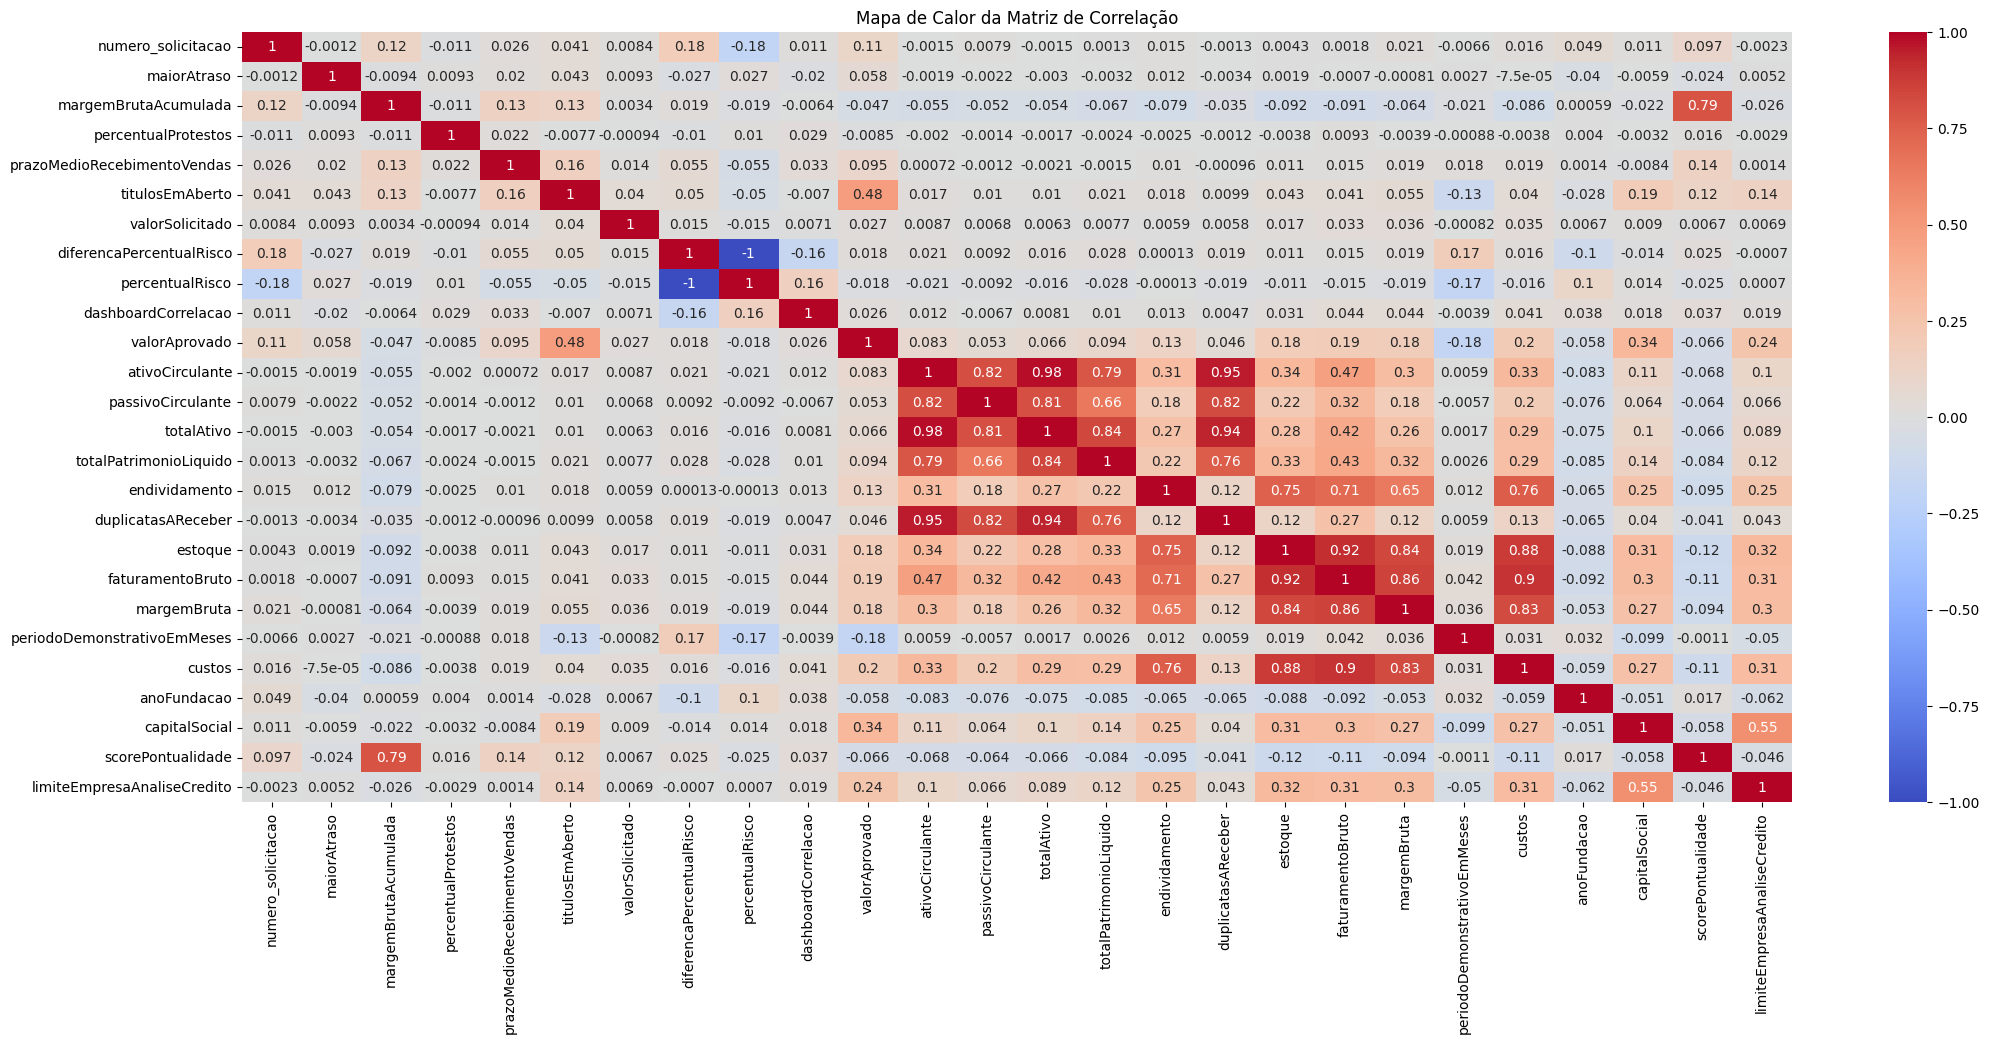

In [48]:
# Selecionar apenas as colunas numéricas
dados_numericos = dados_sem_null.select_dtypes(include=['number'])

# Calcular a matriz de correlação
correlacao = dados_numericos.corr()

# Ajustar o tamanho da figura
plt.figure(figsize=(25, 10))

# Plotar o mapa de calor da matriz de correlação
sns.heatmap(correlacao, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor da Matriz de Correlação')
plt.show()
